In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import datetime
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
tables = inspector.get_table_names()
tables

['measurement', 'station']

In [7]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [95]:
station_results = session.query(Station.id,Station.station, Station.name).\
    order_by(Station.id).all()
station_results

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US'),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US'),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 (4, 'USC00517948', 'PEARL CITY, HI US'),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US'),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [12]:
meas_results = session.query(Measurement.id,Measurement.station, Measurement.date,Measurement.prcp,Measurement.tobs).\
    order_by(Measurement.station).all()
meas_results

[(14960, 'USC00511918', '2010-01-01', 0.05, 66.0),
 (14961, 'USC00511918', '2010-01-02', 0.0, 70.0),
 (14962, 'USC00511918', '2010-01-03', 0.0, 75.0),
 (14963, 'USC00511918', '2010-01-04', 0.0, 75.0),
 (14964, 'USC00511918', '2010-01-05', 0.0, 75.0),
 (14965, 'USC00511918', '2010-01-06', 0.08, 72.0),
 (14966, 'USC00511918', '2010-01-07', 0.04, 70.0),
 (14967, 'USC00511918', '2010-01-08', 0.0, 63.0),
 (14968, 'USC00511918', '2010-01-09', 0.0, 68.0),
 (14969, 'USC00511918', '2010-01-10', 0.0, 74.0),
 (14970, 'USC00511918', '2010-01-11', 0.05, 64.0),
 (14971, 'USC00511918', '2010-01-12', 0.0, 57.0),
 (14972, 'USC00511918', '2010-01-13', 0.0, 57.0),
 (14973, 'USC00511918', '2010-01-14', 0.0, 65.0),
 (14974, 'USC00511918', '2010-01-15', 0.0, 56.0),
 (14975, 'USC00511918', '2010-01-16', 0.0, 66.0),
 (14976, 'USC00511918', '2010-01-18', 0.0, 73.0),
 (14977, 'USC00511918', '2010-01-19', 0.0, 61.0),
 (14978, 'USC00511918', '2010-01-20', 0.0, 66.0),
 (14979, 'USC00511918', '2010-01-21', 0.0, 68.

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

results = session.query (Measurement.date).\
        order_by(Measurement.date.desc()).first()
results
finalDate = results[0]
finalDate

'2017-08-23'

In [16]:
# Calculate the date 1 year ago from the last data point in the database
print(finalDate)
dtFinalDate = datetime.strptime(finalDate, "%Y-%m-%d")

dtFinalyear = dtFinalDate - dt.timedelta(days=365)
strFinalyear = dtFinalyear.strftime("%Y-%m-%d")
strFinalyear

2017-08-23


'2016-08-23'

In [17]:
# Perform a query to retrieve the data and precipitation scores
prcp_results =session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > strFinalyear).all()

In [70]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipResults_df = pd.DataFrame(prcp_results, columns=['date', 'precip'])
precipResults_df.set_index('date', inplace=True, )


In [98]:
# Sort the dataframe by date
precipResults_df = precipResults_df.sort_values(by=['date'])
precipResults_df.count()

precip    2015
dtype: int64

In [99]:
precipResults_df.dropna(inplace = True)
precipResults_df.count()

precip    2015
dtype: int64

In [100]:
x = precipResults_df['precip']
x = list(precipResults_df.index)
reducedList =  x[0::150]

dtTicks = np.arange(start=0, stop=2015, step=150)
reducedList

['2016-08-24',
 '2016-09-20',
 '2016-10-14',
 '2016-11-09',
 '2016-12-06',
 '2017-01-01',
 '2017-01-28',
 '2017-02-23',
 '2017-03-23',
 '2017-04-18',
 '2017-05-15',
 '2017-06-12',
 '2017-07-09',
 '2017-08-05']

[Text(0, 0, '2016-08-24'),
 Text(1, 0, '2016-09-20'),
 Text(2, 0, '2016-10-14'),
 Text(3, 0, '2016-11-09'),
 Text(4, 0, '2016-12-06'),
 Text(5, 0, '2017-01-01'),
 Text(6, 0, '2017-01-28'),
 Text(7, 0, '2017-02-23'),
 Text(8, 0, '2017-03-23'),
 Text(9, 0, '2017-04-18'),
 Text(10, 0, '2017-05-15'),
 Text(11, 0, '2017-06-12'),
 Text(12, 0, '2017-07-09'),
 Text(13, 0, '2017-08-05')]

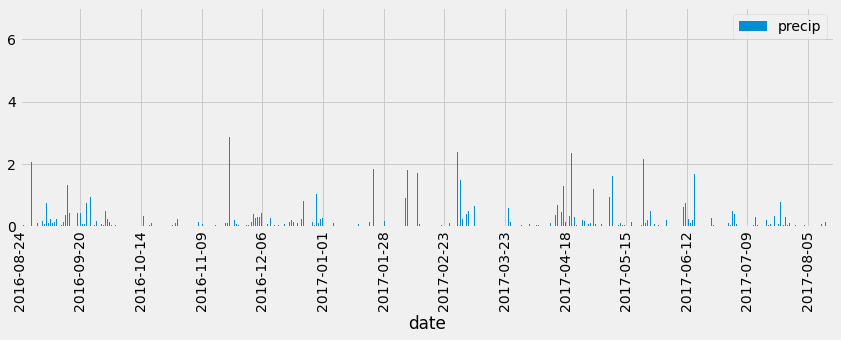

In [101]:
ax = precipResults_df.plot.bar(rot=90,figsize=(12,5))
ax.figure.tight_layout()
ax.set_xticks(dtTicks)
ax.set_xticklabels(reducedList)

In [44]:
# Design a query to show how many stations are available in this dataset?
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

measurementResults_df = pd.DataFrame(meas_results, columns=['measID','station','date','precip','tobs'])
g1 = measurementResults_df.groupby( [ "station"] ).count().reset_index()
g1 = g1.sort_values(['measID'],ascending=False)
print(g1)
print(f"There are {len(g1)} stations with recorded measurements.")

print(f"The most active station is {g1.iloc[0,0]}")

       station  measID  date  precip  tobs
6  USC00519281    2772  2772    2772  2772
7  USC00519397    2724  2724    2685  2724
1  USC00513117    2709  2709    2696  2709
8  USC00519523    2669  2669    2572  2669
3  USC00516128    2612  2612    2484  2612
2  USC00514830    2202  2202    1937  2202
0  USC00511918    1979  1979    1932  1979
4  USC00517948    1372  1372     683  1372
5  USC00518838     511   511     342   511
There are 9 stations with recorded measurements.
The most active station is USC00519281


In [50]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
stationmeasdf = measurementResults_df[measurementResults_df['station']==g1.iloc[0,0]]

print(f"The minumum temperature for the most active station is {stationmeasdf['tobs'].min()}")
print(f"The maximum temperature for the most active station is {stationmeasdf['tobs'].max()}")
print(f"The average temperature for the most active station is {stationmeasdf['tobs'].mean()}")

The minumum temperature for the most active station is 54.0
The maximum temperature for the most active station is 85.0
The average temperature for the most active station is 71.66378066378067


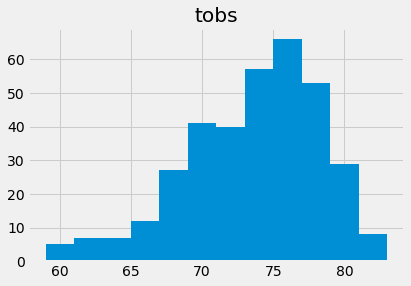

In [59]:
# Choose the station with the highest number of temperature observations.

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_lastyr_df = stationmeasdf[stationmeasdf['date']>= strFinalyear].sort_values('date')
station_lastyr_df
hist = station_lastyr_df.hist(column="tobs",bins=12)


## Bonus Challenge Assignment

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [21]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [22]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [23]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [24]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [25]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [26]:
# Plot the daily normals as an area plot with `stacked=False`
